In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

import os

In [7]:
f = open(r'C:\Users\kevin\Documents\jupyter notebooks\memgraph\class 3 assignment graph.txt', 'r')
graph_adj_list = f.read()
f.close()

edges = graph_adj_list.split('\n')

In [11]:
edge_list = [(e.split()[0], e.split()[1], int(e.split()[2]))  for e in edges]
edge_list

[('0', '1', 4),
 ('0', '8', 8),
 ('1', '8', 11),
 ('1', '2', 8),
 ('8', '6', 7),
 ('8', '7', 1),
 ('2', '3', 7),
 ('2', '5', 5),
 ('2', '6', 2),
 ('6', '7', 6),
 ('7', '5', 6),
 ('3', '4', 9),
 ('3', '5', 14),
 ('5', '4', 10)]

In [12]:
G = nx.Graph()
G.add_weighted_edges_from(edge_list)

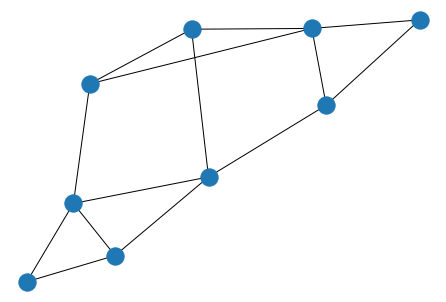

In [13]:
nx.draw(G)
plt.show()

In [25]:
node_names = list(G.nodes())
node_names

['0', '1', '8', '2', '6', '7', '3', '5', '4']

In [32]:
edge_weights = nx.get_edge_attributes(G, 'weight')

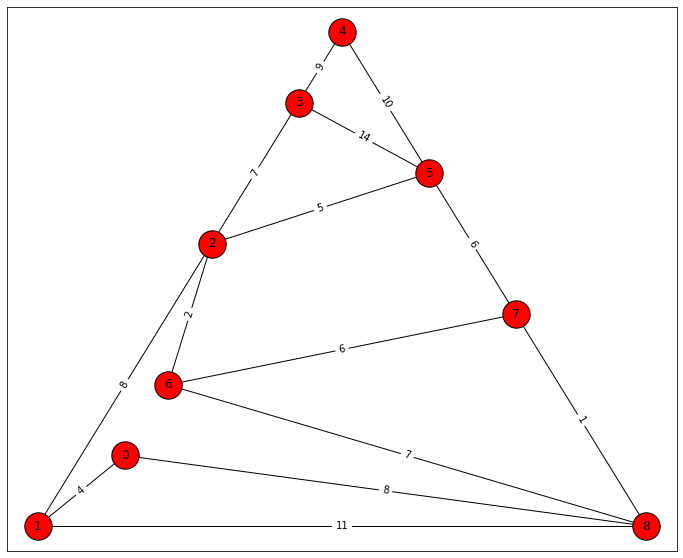

In [36]:
plt.figure(1,figsize=(12,10)) 

pos = nx.planar_layout(G)

nx.draw_networkx_nodes(G, pos, node_size= 750, edgecolors = 'black', node_color = 'red')
nx.draw_networkx_edges(G, pos, )
nx.draw_networkx_labels(G, pos, labels = {node: node for node in node_names})
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weights)

plt.show()

In [41]:
print("Shortest path from node 0 t node 4 is: ", nx.dijkstra_path(G, '0', '4', weight='weight'))

Shortest path from node 0 t node 4 is:  ['0', '8', '7', '5', '4']


In [42]:
shortest_path = nx.dijkstra_path(G, '0', '4', weight='weight')
print("length of shortest path: ", len(shortest_path)) 

length of shortest path:  5


In [51]:
for i in range(len(shortest_path)):
    if i < len(shortest_path) - 1:
        edge = (shortest_path[i], shortest_path[i+1])
        print(edge, ", weight: ", G.edges()[edge]['weight'])

('0', '8') , weight:  8
('8', '7') , weight:  1
('7', '5') , weight:  6
('5', '4') , weight:  10


In [52]:
weighted_shortest_path = 0

for i in range(len(shortest_path)):
    if i < len(shortest_path) - 1:
        weighted_shortest_path += G.edges()[(shortest_path[i], shortest_path[i+1])]['weight']
        
print("Weighted shortest path: ", weighted_shortest_path)

Weighted shortest path:  25


In [60]:
print("Double-checking weighted shortest path: ",  nx.shortest_path_length(G, source="0", target="4", weight='weight'))


Double-checking weighted shortest path:  25


# Breadth first search

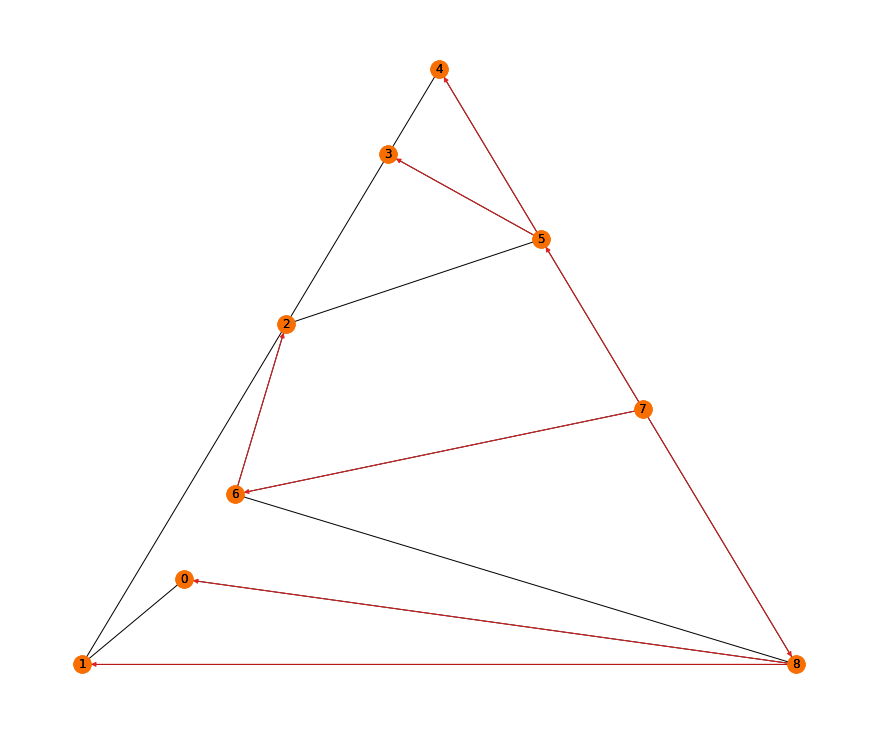

In [63]:
output_file = r"C:\Users\kevin\Documents\jupyter notebooks\memgraph\hw3 pictures"
file_name = "breadth-first search.png"
plt.figure(1,figsize=(12,10)) 

pos = nx.planar_layout(G)


nx.draw(G, pos, with_labels=True, node_color="#f86e00")

bfs = nx.bfs_tree(G, source="7")

nx.draw(bfs, pos, with_labels=True, node_color="#f86e00", edge_color="#dd2222")
plt.savefig(os.path.join(output_file, file_name))
plt.show()

# Depth first search

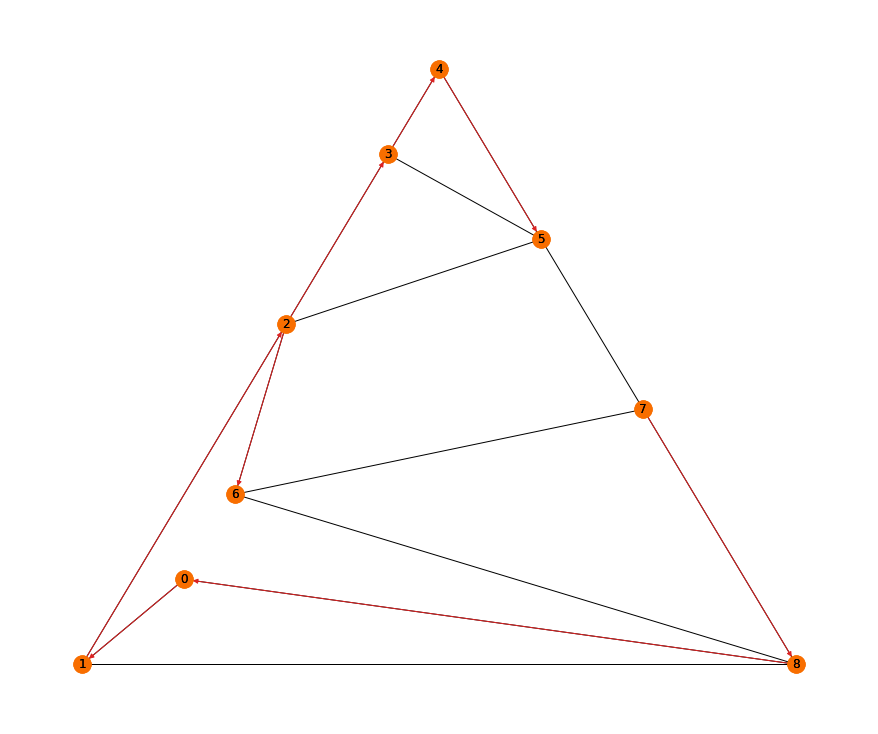

In [65]:

plt.figure(1,figsize=(12,10)) 

pos = nx.planar_layout(G)


nx.draw(G, pos, with_labels=True, node_color="#f86e00")

dfs = nx.dfs_tree(G, source="7")

nx.draw(dfs, pos, with_labels=True, node_color="#f86e00", edge_color="#dd2222")
plt.savefig(os.path.join(output_file, "depth-first search.png"))
plt.show()

# Pagerank

In [56]:
pagerank = nx.pagerank(G)
sorted_pgrk = sorted(pagerank.items(), key = lambda x: x[1], reverse=True)

In [59]:
print("The nodes with  the highest pagerank value is: ", sorted_pgrk[0][0])

The nodes with  the highest pagerank value is:  5
